In [1]:
%matplotlib inline

In [51]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [52]:
#read file
file1 = 'song_data.csv'
file2 = 'song_info.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [53]:
#combine data from 2 files
song_merged = pd.merge(df1,df2,how="inner",left_index=True, right_index=True)

In [54]:
#check for song_name values
#song_merged.iloc[7018]
#song_sorted = song_merged.sort_values(by=["song_name_x","artist_name", "album_names"], ascending=True)
#song_sorted

In [55]:
#change column name  => will not be necessary, it will be deleted after cleaning data
#song_merged = song_merged.rename(columns={"song_name_x":"song_name"})
#song_merged

In [56]:
#clean data
#delete duplicated song_name ana all column's data except album_name

#delete unnecessary columns
#del song_merged["song_name_y"]
#df.drop('a', axis=1, inplace=True) on Table
song_deleted = song_merged.drop(columns=["playlist", "song_name_y", "album_names" ])

#change column name
song_deleted.columns = song_deleted.columns.str.replace("song_name_x","song_name")
#18835 song_deleted.count()

#delete duplicate
#song_deleted.drop_duplicates(subset ="First Name",keep = False, inplace = True) 
#song_deleted.drop_duplicates(keep = False, inplace = True) 
song_deleted.drop_duplicates(inplace = True) 
#song_deleted.count()

#sort by popularity 
song_data = song_deleted.sort_values("song_popularity")

In [57]:
#check sorted data : 14926 rows x 16 columns with song name
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name
17604,Make It Back,0,102560,0.12200,0.750,0.387,0.000000,1,0.0993,-10.123,0,0.4870,143.019,4,0.739,Juice WRLD
14349,Choco / Mog,0,120000,0.57200,0.690,0.731,0.458000,4,0.2420,-5.473,0,0.1870,82.017,4,0.703,Devonwho
4234,Como Deseo Ser Tu Amor,0,227160,0.37200,0.511,0.405,0.000262,9,0.1510,-10.254,1,0.0366,89.841,4,0.459,Los Galos
9394,Down and Out,0,200306,0.00127,0.562,0.698,0.001890,9,0.1460,-5.956,0,0.0439,119.971,4,0.375,The Griswolds
9389,Heartbreaker,0,300663,0.12600,0.373,0.906,0.001230,8,0.1430,-6.750,0,0.0893,110.007,4,0.488,Daniel Wilson


In [58]:
#clean unnecessary columns 
song_data = song_data.drop(columns=["song_name", "artist_name"])
#song_data.count()  # 14926 x14
song_data.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
17604,0,102560,0.12200,0.750,0.387,0.000000,1,0.0993,-10.123,0,0.4870,143.019,4,0.739
14349,0,120000,0.57200,0.690,0.731,0.458000,4,0.2420,-5.473,0,0.1870,82.017,4,0.703
4234,0,227160,0.37200,0.511,0.405,0.000262,9,0.1510,-10.254,1,0.0366,89.841,4,0.459
9394,0,200306,0.00127,0.562,0.698,0.001890,9,0.1460,-5.956,0,0.0439,119.971,4,0.375
9389,0,300663,0.12600,0.373,0.906,0.001230,8,0.1430,-6.750,0,0.0893,110.007,4,0.488


In [59]:
#sns.pairplot(song_data)
#sns.distplot(song_data['song_popularity'])

In [60]:
corr = song_data.corr()
corr.style.background_gradient(cmap="Blues") #coolwarm #plt.cm.PuBu

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1,-0.00776572,-0.0316578,0.0564145,-0.0164682,-0.0930324,-0.00387769,-0.0385532,0.052114,0.00882404,-0.00197093,-0.02956,0.0233069,-0.0439626
song_duration_ms,-0.00776572,1,-0.113314,-0.0893385,0.0963754,-0.0248502,-0.00674927,0.0207572,0.0278373,-0.0280558,-0.0794383,0.0136079,0.00408042,-0.0697628
acousticness,-0.0316578,-0.113314,1,-0.171859,-0.679235,0.179259,-0.000632286,-0.0852422,-0.569681,0.0594434,-0.0854351,-0.144736,-0.15118,-0.126915
danceability,0.0564145,-0.0893385,-0.171859,1,0.0536574,-0.124926,0.00759866,-0.0943733,0.173495,-0.0990389,0.200715,-0.127313,0.136211,0.350012
energy,-0.0164682,0.0963754,-0.679235,0.0536574,1,-0.221755,0.0146532,0.175979,0.765706,-0.0490397,0.0721379,0.182517,0.143516,0.315023
instrumentalness,-0.0930324,-0.0248502,0.179259,-0.124926,-0.221755,1,-0.008496,-0.0398215,-0.398912,-0.0188521,-0.0767055,-0.0410321,-0.0686561,-0.197783
key,-0.00387769,-0.00674927,-0.000632286,0.00759866,0.0146532,-0.008496,1,-0.00325436,0.0080016,-0.174955,0.0285647,-0.00503327,-0.00875016,0.0236261
liveness,-0.0385532,0.0207572,-0.0852422,-0.0943733,0.175979,-0.0398215,-0.00325436,1,0.111716,-0.00172901,0.0942288,0.0256814,0.0147923,0.0165718
loudness,0.052114,0.0278373,-0.569681,0.173495,0.765706,-0.398912,0.0080016,0.111716,1,-0.0557925,0.0784176,0.140217,0.112596,0.209803
audio_mode,0.00882404,-0.0280558,0.0594434,-0.0990389,-0.0490397,-0.0188521,-0.174955,-0.00172901,-0.0557925,1,-0.110686,0.0218633,-0.0207893,0.00225365


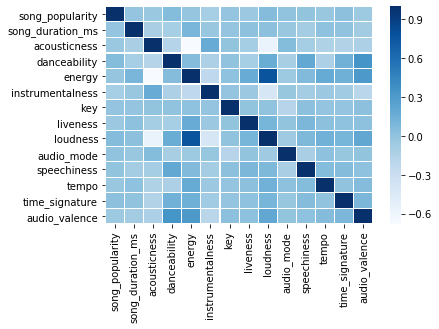

In [61]:
# colorbar
ax = sns.heatmap(corr,  linewidth=0.1,   cmap="Blues")
#   cmap="YlGn", "YlGnBu", cmap=plt.cm.PuBu_r, cbarlabel="Correlation"

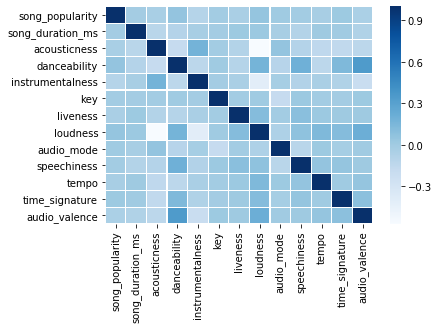

In [62]:
#delete song feature : energy , 
song_data_drop = song_data
song_data_drop = song_data_drop.drop(columns=["energy"])
song_data_drop.head()
corr = song_data_drop.corr()
corr.style.background_gradient(cmap="Blues")
ax = sns.heatmap(corr,  linewidth=0.1,   cmap="Blues")

In [68]:
#fit the regresion model to predict song popularity from song features
result = sm.ols(formula="song_popularity ~ song_duration_ms + acousticness + danceability + instrumentalness + key + liveness + loudness + audio_mode + speechiness + tempo + time_signature + audio_valence",data=song_data_drop).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        song_popularity   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     26.50
Date:                Fri, 13 Sep 2019   Prob (F-statistic):           3.75e-60
Time:                        00:30:50   Log-Likelihood:                -66016.
No. Observations:               14926   AIC:                         1.321e+05
Df Residuals:                   14913   BIC:                         1.322e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           49.4857      2.521  

In [ ]:
#highly predictor for song popularity:
P> |t|  =>  almost 0
danceability, instrumentalness, liveness, audio_valence, tempo

In [73]:
#fit the regresion model to predict song popularity from selected song features
result2 = sm.ols(formula="song_popularity ~ danceability + instrumentalness + liveness + audio_valence",data=song_data_drop).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:        song_popularity   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     71.63
Date:                Fri, 13 Sep 2019   Prob (F-statistic):           3.32e-60
Time:                        00:49:01   Log-Likelihood:                -66031.
No. Observations:               14926   AIC:                         1.321e+05
Df Residuals:                   14921   BIC:                         1.321e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           48.5302      0.757  

In [ ]:
#final model
#Song popularity = 4.8 + 0.92* Danceability 
#                      - 0.87* Instrumentalness 
#                      - 0.48* Liveness
#                      - 0.73* Audio_valence; with R^2 = 0.019, p < 0.001.


In [64]:
#Conclusion
#R^2 is very low, total variation is less than 2 % in song popularity
#Song features influence posively and negately to Song Popularity


In [ ]:
#plt.matshow(song_data.corr())

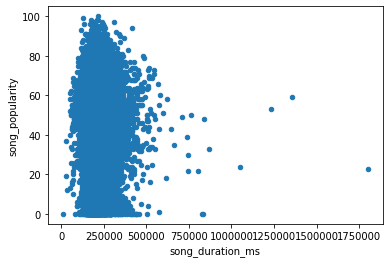

In [65]:
song_data.plot(x='song_duration_ms', y='song_popularity', kind='scatter')

In [18]:
#check song_popularity for x_axis value  : 0 to 100, increased on 1
#ss = song_data["song_popularity"].unique()
#ss.sort()
#ss

In [19]:
#song_popularity	song_duration_ms	acousticness	danceability	energy	instrumentalness	key	liveness	loudness	audio_mode	speechiness	tempo	time_signature	audio_valence

# study about song_popularity freq
# 100 = max value of song_popularity
max_value = song_data["song_popularity"].max()
min_value = song_data["song_popularity"].min()
len_value = len(song_data["song_popularity"].unique())

freq = song_data["song_popularity"].value_counts()
#freq.dtypes int64

#create table
s = song_data["song_popularity"].value_counts() 
song_pop = pd.DataFrame({'popularity':s.index, 'freq':s.values})
song_pop = song_pop.sort_values("popularity")
#song_pop

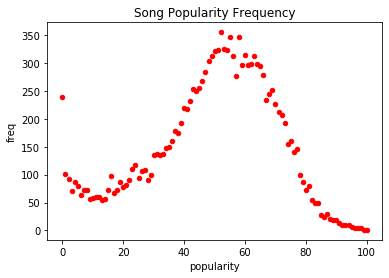

In [20]:
#graph popularity freq
#pop
##x_axis = np.arange(0, len_value, 20)
##y_axis = song_pop["freq"]
##plt.plot(x_axis, y_axis)
##plt.show()
song_pop.plot(kind='scatter',x='popularity',y='freq',color='red')
plt.title("Song Popularity Frequency")
plt.show()

In [21]:
#song_duration_ms	acousticness	danceability	energy	instrumentalness	key	liveness	loudness	audio_mode	speechiness	tempo	time_signature	audio_valence


# study about song_popularity & duration
# 100 = max value of song_popularity
dura_max_value = song_data["song_duration_ms"].max() #1799346 29.99min  , 30min = 1,800,000
dura_min_value = song_data["song_duration_ms"].min() #12000   0.2min   , 1min = 60,000
dura_len_value = len(song_data["song_duration_ms"].unique())  #11771 

song_dura = song_data[["song_duration_ms", "song_popularity"]]
song_dura = song_dura.rename(columns={"song_duration_ms":"duration_ms","song_popularity":"popularity" })
#song_dura
#song_dura.plot(kind='scatter',x='duration_ms',y='popularity',color='red')
#plt.show()

#cut data
song_dura = song_dura[song_dura.duration_ms < 500000]
song_dura.plot(kind='scatter',x='duration_ms',y='popularity',color='darkseagreen')
plt.title("Song duration in ms vs Song Popularity")

model = LinearRegression()
model.fit(x=song_dura['duration_ms'],y=song_dura['popularity'])
song_dura.plot(kind='linear', x='duration_ms', y= model.predict('duration_ms')



plt.show()

SyntaxError: invalid syntax (<ipython-input-21-510a6b573207>, line 27)

In [ ]:
# freq of song_duration_ms
freq = song_data["song_duration_ms"].value_counts()
s = song_data["song_duration_ms"].value_counts() 
song_dura = pd.DataFrame({'song_duration_ms':s.index, 'freq':s.values})

#song_dura = song_dura[(song_dura.song_duration_ms < 250000) &(song_dura.song_duration_ms > 150000)]
song_dura.plot(kind='scatter',x='song_duration_ms',y='freq',color='c')
plt.title("Song duration in ms Frequency")
plt.show()

In [ ]:
#acousticness	danceability	energy	instrumentalness	key	liveness	loudness	audio_mode	speechiness	tempo	time_signature	audio_valence

song_data.plot(kind='scatter',x='acousticness',y='song_popularity',color='blue')
plt.title("Song Acousticness vs Song Popularity")
plt.show()

In [ ]:
# freq of acousticness
freq = song_data["acousticness"].value_counts()
s = song_data["acousticness"].value_counts() 
song_acu = pd.DataFrame({'acousticness':s.index, 'freq':s.values})
song_acu.plot(kind='scatter',x='acousticness',y='freq',color='c')
plt.title("Song Acousticness Frequency")
plt.show()

In [ ]:
#danceability	energy	instrumentalness	key	liveness	loudness	audio_mode	speechiness	tempo	time_signature	audio_valence

song_data.plot(kind='scatter',x='danceability',y='song_popularity',color='grey')
plt.title("Song Popularity vs Danceability")
plt.show()

In [ ]:
# freq of danceability
freq = song_data["danceability"].value_counts()
s = song_data["danceability"].value_counts() 
song_energy = pd.DataFrame({'danceability':s.index, 'freq':s.values})
song_energy.plot(kind='scatter',x='danceability',y='freq',color='c')
plt.title("Danceability Frequency")
plt.show()

In [ ]:
#energy	instrumentalness	key	liveness	loudness	audio_mode	speechiness	tempo	time_signature	audio_valence

song_data.plot(kind='scatter',x='energy',y='song_popularity',color='grey')
plt.title("Song Energy vs Song Popularity")
plt.show()

In [ ]:
# freq of energy
freq = song_data["energy"].value_counts()
s = song_data["energy"].value_counts() 
song_energy = pd.DataFrame({'energy':s.index, 'freq':s.values})
song_energy.plot(kind='scatter',x='energy',y='freq',color='c')
plt.title("Song Energy Frequency")
plt.show()

In [ ]:
#instrumentalness	key	liveness	loudness	audio_mode	speechiness	tempo	time_signature	audio_valence

song_data.plot(kind='scatter',x='instrumentalness',y='song_popularity',color='lightblue')
plt.title("Song Instrumentaness vs Song Popularity")
plt.show()

In [ ]:
# freq of instrumentalness
freq = song_data["instrumentalness"].value_counts()
s = song_data["instrumentalness"].value_counts() 
song_inst = pd.DataFrame({'instrumentalness':s.index, 'freq':s.values})

song_inst = song_inst[song_inst.instrumentalness > 0]
song_inst.plot(kind='scatter',x='instrumentalness',y='freq',color='c')
plt.title("Song Instrumentalness Frequency")
plt.show()

In [ ]:
# freq of danceability
freq = song_data["danceability"].value_counts()
s = song_data["danceability"].value_counts() 
song_dance = pd.DataFrame({'danceability':s.index, 'freq':s.values})
song_dance.plot(kind='scatter',x='danceability',y='freq',color='c')
plt.show()

In [ ]:
#key	liveness	loudness	audio_mode	speechiness	tempo	time_signature	audio_valence

song_data.plot(kind='scatter',x='key',y='song_popularity',color='steelblue')
plt.title("Song Key vs Song Popularity")
plt.show()

In [ ]:
# freq of key
freq = song_data["key"].value_counts()
s = song_data["key"].value_counts() 
song_key = pd.DataFrame({'key':s.index, 'freq':s.values})
song_key.plot(kind='scatter',x='key',y='freq',color='c')
plt.title("Song Key Frequency")
plt.show()

In [ ]:
#liveness	loudness	audio_mode	speechiness	tempo	time_signature	audio_valence

song_data.plot(kind='scatter',x='liveness',y='song_popularity',color='orange')
plt.title("Song Liveness vs Song Popularity")
plt.show()

In [ ]:
# freq of liveness
freq = song_data["liveness"].value_counts()
s = song_data["liveness"].value_counts() 
song_live = pd.DataFrame({'liveness':s.index, 'freq':s.values})
song_live.plot(kind='scatter',x='liveness',y='freq',color='c')
plt.title("Song Liveness Frequency")
plt.show()

In [ ]:
#loudness	audio_mode	speechiness	tempo	time_signature	audio_valence

song_data.plot(kind='scatter',x='loudness',y='song_popularity',color='steelblue')
plt.title("Song Loudness vs Song Popularity")
plt.show()

In [ ]:
# freq of loudness
freq = song_data["loudness"].value_counts()
s = song_data["loudness"].value_counts() 
song_audio = pd.DataFrame({'loudness':s.index, 'freq':s.values})
song_audio.plot(kind='scatter',x='loudness',y='freq',color='c')
plt.title("Song Loudness Frequency")
plt.show()

In [ ]:
#audio_mode	speechiness	tempo	time_signature	audio_valence

song_data.plot(kind='scatter',x='audio_mode',y='song_popularity',color='steelblue')
plt.title("Song Audio Mode vs Song Popularity")
plt.show()

In [ ]:
# freq of Audio_mode
freq = song_data["audio_mode"].value_counts()
s = song_data["audio_mode"].value_counts() 
song_audio = pd.DataFrame({'audio_mode':s.index, 'freq':s.values})
song_audio.plot(kind='scatter',x='audio_mode',y='freq',color='c')
plt.title("Song Audio Mode Frequency")
plt.show()

In [ ]:
#speechiness	tempo	time_signature	audio_valence

song_data.plot(kind='scatter',x='speechiness',y='song_popularity',color='gold')
plt.title("Song Speechiness vs Song Popularity")
plt.show()

In [ ]:
# freq of speechiness
freq = song_data["speechiness"].value_counts()
s = song_data["speechiness"].value_counts() 
song_speech = pd.DataFrame({'speechiness':s.index, 'freq':s.values})
song_speech.plot(kind='scatter',x='speechiness',y='freq',color='c')
plt.title("Song Speechness Frequency")
plt.show()

In [ ]:
#tempo	time_signature	audio_valence

#song_data.plot(kind='scatter',x='tempo',y='song_popularity',color='tomato')

#cut data
song_tempo = song_data[(song_data.tempo > 50) & (song_data.tempo < 200)]
song_tempo.plot(kind='scatter',x='tempo',y='song_popularity',color='tomato')
plt.title("Song Tempo vs Song Popularity")
plt.show()

In [ ]:
# freq of tempo
freq = song_data["tempo"].value_counts()
s = song_data["tempo"].value_counts() 
song_speech = pd.DataFrame({'tempo':s.index, 'freq':s.values})
song_speech.plot(kind='scatter',x='tempo',y='freq',color='c')
plt.title("Song Tempo Frequency")
plt.show()

In [ ]:
#time_signature	audio_valence

#time_signature
song_data.plot(kind='scatter',x='time_signature',y='song_popularity',color='plum')
plt.title("Song Time Signiture vs Song Popularity")
plt.show()

In [ ]:
# freq of time_signature
freq = song_data["time_signature"].value_counts()
s = song_data["time_signature"].value_counts() 
song_valence = pd.DataFrame({'time_signature':s.index, 'freq':s.values})
song_valence.plot(kind='scatter',x='time_signature',y='freq',color='c')
plt.title("Song Time Signiture Frequency")
plt.show()

In [ ]:
#audio_valence
song_data.plot(kind='scatter',x='audio_valence',y='song_popularity',color='plum')
plt.title("Song Audio Valence vs Song Popularity")
plt.show()

In [ ]:
# freq of audio_valence
freq = song_data["audio_valence"].value_counts()
s = song_data["audio_valence"].value_counts() 
song_valence = pd.DataFrame({'audio_valence':s.index, 'freq':s.values})
song_valence.plot(kind='scatter',x='audio_valence',y='freq',color='c')
plt.title("Audio Valence Frequency")
plt.show()

In [ ]:
#loudness vs energy
song_data.plot(kind='scatter',x='loudness',y='energy',color='plum')
plt.title("Song Loudness vs Energy")
plt.show()

In [ ]:
#acousticness vs energy
song_data.plot(kind='scatter',x='acousticness',y='energy',color='darkorchid')
plt.title("Acousticness vs Energy")
plt.show()